In [384]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [385]:
df = pd.read_csv('dodgers.csv')
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [386]:
# Problem given specified night games
df = df[df['day_night'] == 'Night' ]

In [388]:
# Check attendance means by day and month
df.groupby(['day_of_week', 'month'], as_index=True)[['attend']].mean()

attend
day_of_week month              
Friday      APR    38204.000000
            AUG    40321.333333
            JUL    43873.000000
            JUN    45097.500000
            MAY    37593.333333
            SEP    38650.000000
Monday      APR    26376.000000
            AUG    34768.500000
            JUL    33303.666667
            JUN    50559.000000
            MAY    35347.000000
            OCT    33624.000000
            SEP    33540.000000
Saturday    APR    50395.500000
            AUG    43436.000000
            JUL    54014.000000
            JUN    45210.000000
            MAY    36559.666667
            SEP    39721.666667
Sunday      JUL    55359.000000
            MAY    44005.000000
Thursday    APR    28328.000000
            AUG    54621.000000
            JUN    49006.000000
            MAY    26773.000000
            SEP    43309.000000
Tuesday     APR    44014.000000
            AUG    55512.000000
            JUL    46738.000000
            JUN    55279.000000
            MAY    43671.000000
            OCT    42473.000000
            SEP    40619.000000
Wednesday   APR    28037.000000
            AUG    38628.500000
            JUL    53570.000000
            JUN    43494.000000
            MAY    29751.000000
            OCT    34014.000000
            SEP    50560.000000

In [389]:
# check number of games occuring
df.groupby(['day_of_week', 'month'], as_index=True)[['attend']].count()

attend
day_of_week month        
Friday      APR         2
            AUG         3
            JUL         1
            JUN         2
            MAY         3
            SEP         2
Monday      APR         1
            AUG         2
            JUL         3
            JUN         1
            MAY         3
            OCT         1
            SEP         1
Saturday    APR         2
            AUG         2
            JUL         1
            JUN         1
            MAY         3
            SEP         3
Sunday      JUL         1
            MAY         1
Thursday    APR         1
            AUG         1
            JUN         1
            MAY         1
            SEP         1
Tuesday     APR         1
            AUG         2
            JUL         3
            JUN         1
            MAY         3
            OCT         1
            SEP         1
Wednesday   APR         2
            AUG         2
            JUL         1
            JUN         1
            MAY         2
            OCT         1
            SEP         1

In [390]:
# low value count - not keeping for analysis
df['cap'].value_counts()

NO     65
YES     1
Name: cap, dtype: int64

In [391]:
# low value count - not keeping for analysis
df['shirt'].value_counts()

NO     64
YES     2
Name: shirt, dtype: int64

Text(0.5, 1.0, 'Attendance by Day of the Week')

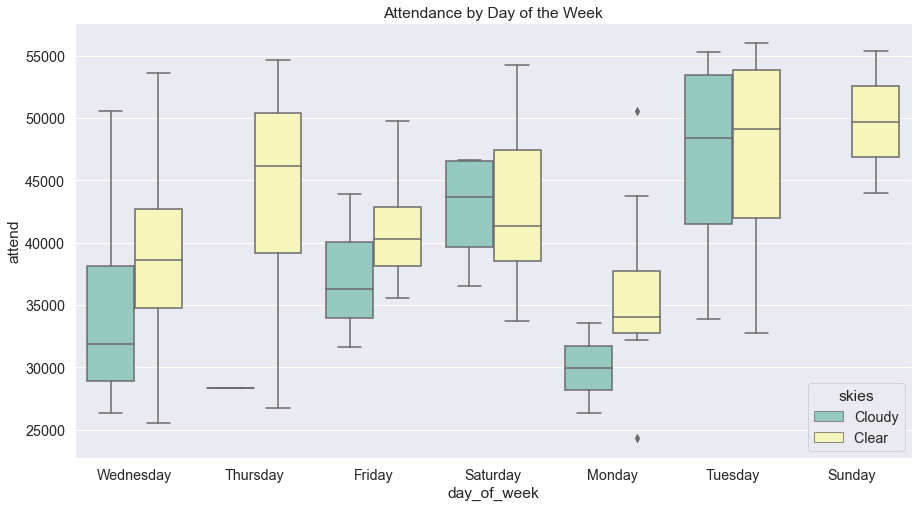

In [411]:
# visualize attendance by day of the week
sns.set(font_scale=1.3)
plt.rcParams['figure.figsize']=(15,8)
ax = sns.boxplot(x="day_of_week", y="attend", hue="skies",
                 data=df, palette="Set3")
ax.set_title('Attendance by Day of the Week')

Text(0.5, 1.0, 'Attendance by Month')

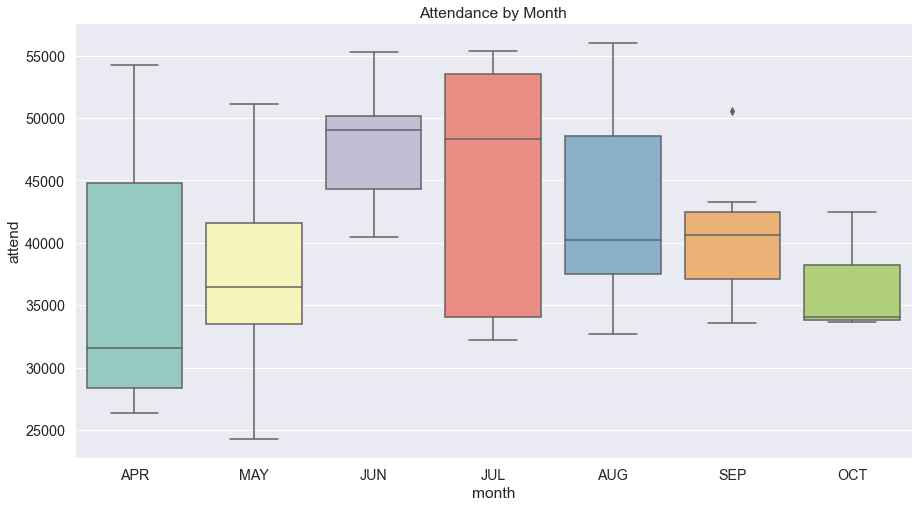

In [412]:
# attendance by month
ax = sns.boxplot(x="month", y="attend",
                 data=df, palette="Set3")
ax.set_title('Attendance by Month')

Text(0.5, 1.0, 'Attendance by Opponent')

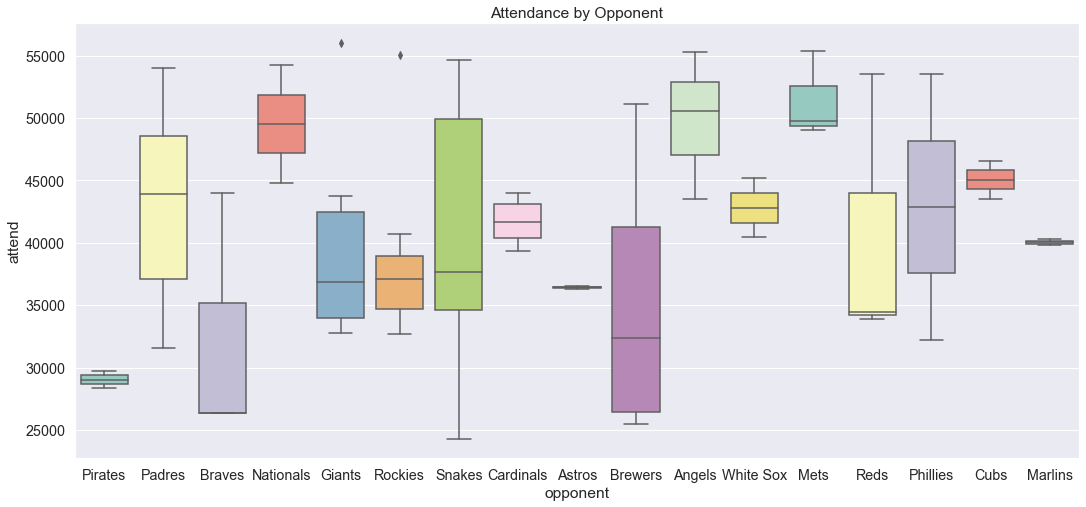

In [415]:
# Attendance by opponent
plt.rcParams['figure.figsize']=(18,8)
ax = sns.boxplot(x="opponent", y="attend",
                 data=df, palette="Set3")
ax.set_title('Attendance by Opponent')

Text(0.5, 1.0, 'Attendance on Nights with Fireworks')

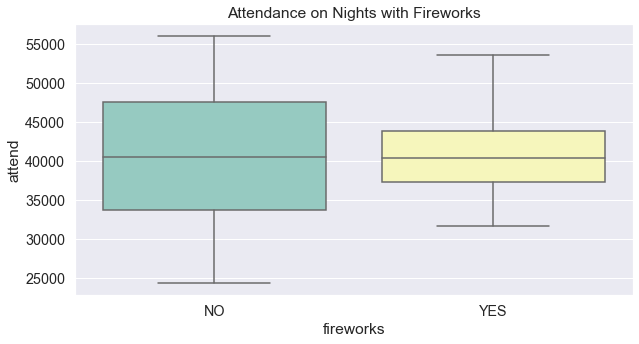

In [416]:
# attendance by fireworks offered
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x='fireworks', y="attend",
                 data=df, palette="Set3")
ax.set_title('Attendance on Nights with Fireworks')

Text(0.5, 1.0, 'Attendance on Nights with Bobbleheads Offered')

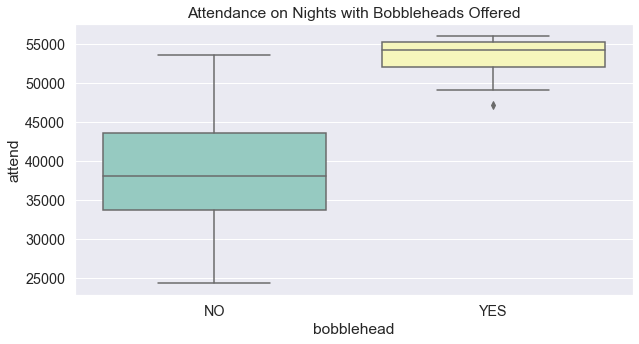

In [417]:
# attendance by bobblehead offered
ax = sns.boxplot(x='bobblehead', y="attend",
                 data=df, palette="Set3")
ax.set_title('Attendance on Nights with Bobbleheads Offered')

Text(0.5, 0.98, 'Attendance by Temperature Outside')

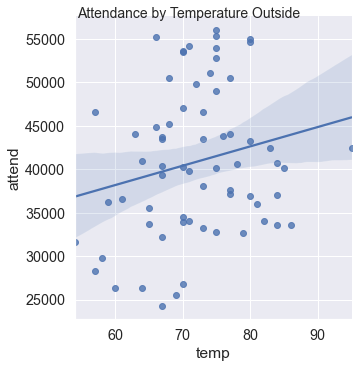

In [427]:
ax = sns.lmplot( x='temp', y='attend', data=df, legend=False)
ax.fig.suptitle('Attendance by Temperature Outside',
                  fontsize=14)

Text(0.5, 0.98, 'Attendance by Day of the Month')

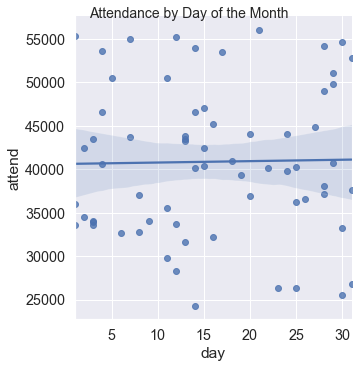

In [430]:
ax = sns.lmplot( x="day", y="attend", data=df, legend=False)
ax.fig.suptitle('Attendance by Day of the Month',
                  fontsize=14)

In [431]:
# Choose days of week and month as independent variables
X = df[['day_of_week', 'month', 'bobblehead']]

In [432]:
# convert to dummies
X = pd.get_dummies(X, drop_first=True)
X

,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,bobblehead_YES
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,0,1,0
76,0,1,0,0,0,0,0,0,0,0,0,1,0
78,1,0,0,0,0,0,0,0,0,0,1,0,0
79,0,0,0,0,1,0,0,0,0,0,1,0,0


In [433]:
# target variable
Y = df[['attend']]
Y

,attend
1,29729
2,28328
3,31601
4,46549
6,26376
...,...
75,37133
76,40724
78,33624
79,42473


In [434]:
import statsmodels.regression.linear_model as lm

In [435]:
# fit OLS model and view results
regressor_ols = lm.OLS(endog = Y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 attend   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              45.05
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                    6.27e-24
Time:                        21:33:26   Log-Likelihood:                         -713.70
No. Observations:                  66   AIC:                                      1453.
Df Residuals:                      53   BIC:                                      1482.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
day_of_week_Monday     1.029e+04   5004.624      2.057      0.045     255.996    2.03e+04
day_of_week_Saturday   1.847e+04   4876.466      3.788      0.000    8693.249    2.83e+04
day_of_week_Sunday     1.912e+04   1.07e+04      1.789      0.079   -2318.236    4.06e+04
day_of_week_Thursday   1.348e+04   6936.344      1.943      0.057    -435.953    2.74e+04
day_of_week_Tuesday    1.732e+04   5704.671      3.036      0.004    5875.281    2.88e+04
day_of_week_Wednesday  1.574e+04   5033.821      3.128      0.003    5647.106    2.58e+04
month_AUG               2.94e+04   4684.860      6.275      0.000       2e+04    3.88e+04
month_JUL              2.804e+04   5478.384      5.118      0.000     1.7e+04     3.9e+04
month_JUN              3.403e+04   5690.131      5.980      0.000    2.26e+04    4.54e+04
month_MAY              2.295e+04   4402.888      5.212      0.000    1.41e+04    3.18e+04
month_OCT              2.225e+04   8667.153      2.567      0.013    4867.867    3.96e+04
month_SEP              2.803e+04   5308.575      5.279      0.000    1.74e+04    3.87e+04
bobblehead_YES         1.013e+04   5630.124      1.799      0.078   -1164.735    2.14e+04
==============================================================================
Omnibus:                       16.930   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.017
Skew:                           1.171   Prob(JB):                     4.50e-05
Kurtosis:                       4.341   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Marketing should be done on Tuesdays in July to get the highest increase in attendance. 

### Sunday had the highest coefficient, but was not chosen because there were only 2 games total for the season. Tuesday was chosen because it had the second highest coefficient, with 12 games throughout the season. The month was chosen because there are 3 Tuesday games offered in July, while June (highest coefficient) only had 1 Tuesday game, and August (second highest coefficient) had 2. In addition, offering Bobbleheads can further increase attendance.